In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
# code settings
pd.set_option('display.max_columns', None)

# visualization settings
plt.rc('figure', figsize=(5,5))
sns.set_style('darkgrid')

In [3]:
regression_short = pd.read_csv('../data/processed/regression_short.csv')
price = pd.read_csv('../data/interim/price_taxes.csv')
health = pd.read_csv('../data/interim/health.csv')

To-Do:
- Preform feature selection
    * Lasso regression
- Write up 
- Clean up notebooks

In order to determine which test to use, must determine if the data is normally distributed

- We'll default to a shapiro-wilk test and K^2 test

In [4]:
def test_normality(df, feat_col):
    
    alpha = 0.05
    
    sns.kdeplot(df[feat_col], label=feat_col)
    plt.show()
    
    # Shapiro-Wilk test
    stat_sw, p_sw = stats.shapiro(df[feat_col])
    
    print('Sharpio-Wilk Test:\nStatistic=%.4f, p=%.4f' % (stat_sw, p_sw))
    
    if p_sw > alpha:
        print('Fail to reject H0, normally distributed')
    else:
        print('Reject H0, not normally distributed')
        
    # D'Agostino K^2
    stat_da, p_da = stats.normaltest(df[feat_col])
    
    print('\nD\'Agostino Test:\nStatistic=%.4f, p=%.4f' % (stat_sw, p_sw))
    
    if p_da > alpha:
        print('Fail to reject H0, normally distributed')
    else:
        print('Reject H0, not normally distributed')

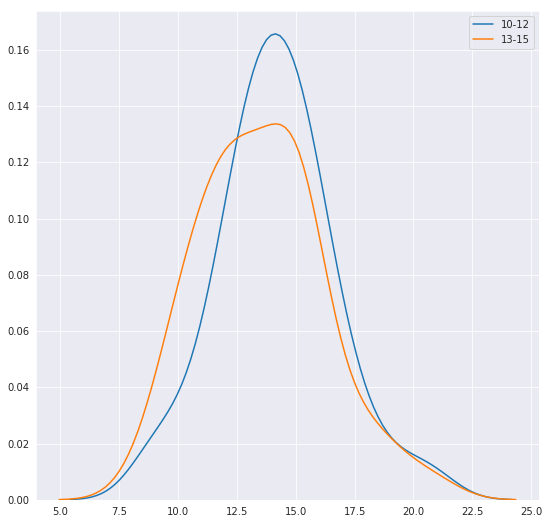

In [5]:
plt.figure(figsize=(9,9))

sns.kdeplot(regression_short['state_FOODINSEC_10_12'], label='10-12')
sns.kdeplot(regression_short['state_FOODINSEC_13_15'], label='13-15')
plt.legend()

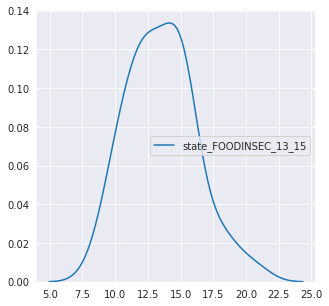

Sharpio-Wilk Test:
Statistic=0.9777, p=0.4450
Fail to reject H0, normally distributed

D'Agostino Test:
Statistic=0.9777, p=0.4450
Fail to reject H0, normally distributed


In [6]:
test_normality(regression_short, 'state_FOODINSEC_13_15')

In [17]:
stats.ttest_rel(regression_short['state_FOODINSEC_10_12'],
                regression_short['state_FOODINSEC_13_15'])


# stat, p

Ttest_relResult(statistic=2.878865632380211, pvalue=0.005858791185468704)

In [20]:
df = regression_short[['state_FOODINSEC_10_12', 'state_FOODINSEC_13_15']].describe()
df
df.loc['mean', 'state_FOODINSEC_10_12'] - df.loc['mean', 'state_FOODINSEC_13_15']

0.6333333333333346

Significance difference in means. Decrease of 0.6333

Asssumptions: iid and normal dist
Our F-test will be:
$$F = \frac{\sigma^2_X}{\sigma^2_Y}$$


levene test does not assume normality

fail to reject null, variance are the same.

Overall mean changes, but variance remains. this is both good and bad.

In [21]:
stats.levene(regression_short['state_FOODINSEC_10_12'],
             regression_short['state_FOODINSEC_13_15'], center='mean')

LeveneResult(statistic=0.803041136388057, pvalue=0.37233781698797197)

Does higher milk/soda ratio correlate pct obsese adult?

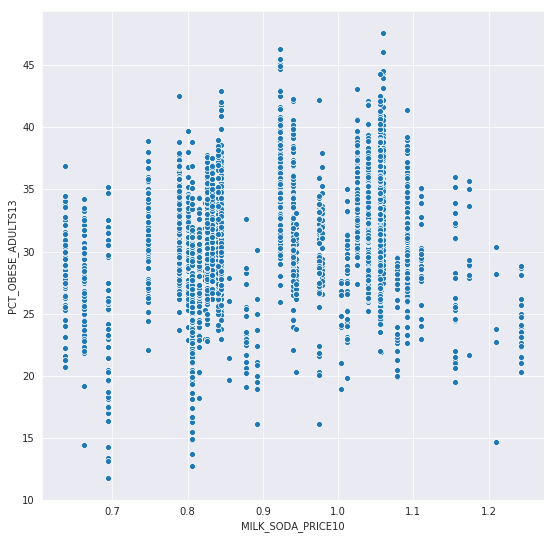

In [43]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=price['MILK_SODA_PRICE10'], y=health['PCT_OBESE_ADULTS13'])

In [10]:
corr_df = pd.DataFrame()

corr_df['PCT_OBESE_ADULTS13'] = health['PCT_OBESE_ADULTS13']
corr_df['MILK_SODA_PRICE10'] = price['MILK_SODA_PRICE10']

corr_df.dropna(inplace=True)

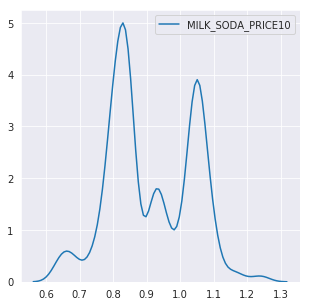

Sharpio-Wilk Test:
Statistic=0.9362, p=0.0000
Reject H0, not normally distributed

D'Agostino Test:
Statistic=0.9362, p=0.0000
Reject H0, not normally distributed


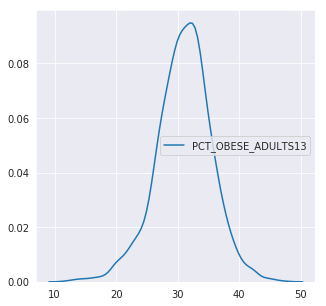

Sharpio-Wilk Test:
Statistic=0.9903, p=0.0000
Reject H0, not normally distributed

D'Agostino Test:
Statistic=0.9903, p=0.0000
Reject H0, not normally distributed


In [35]:
plt.figure(figsize=(5,5))
test_normality(corr_df, 'MILK_SODA_PRICE10')

plt.figure(figsize=(5,5))
test_normality(corr_df, 'PCT_OBESE_ADULTS13')

In [37]:
stats.spearmanr(corr_df['MILK_SODA_PRICE10'], corr_df['PCT_OBESE_ADULTS13'])

SpearmanrResult(correlation=0.167802529116508, pvalue=4.598246152076621e-21)

Used spearman correlation because data is not bivariate normal. Pearson correlation appropriate if there is a linear relationship.  
Significant result, very small positive correlation.